### Fourier component

In [138]:
import numpy as np
from numpy import fft
from matplotlib import pyplot as plt

def fourierExtrapolation(x, n_predict, n_harm):
    n = x.size                      # number of harmonics in model
    t = np.arange(0, n)
   
    x_freqdom = fft.fft(x)  
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    
    # sort indexes by frequency
    indexes.sort(key = lambda i: np.absolute(f[i]))
    
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig 
    

### The function above will preform a fft on data and use the first n_harm frequencies to reconstruct the data(ignoring the high frequency part) 

In [39]:
silso_monthly = np.loadtxt('SILSO_monthly_inJD.txt')

n = 0

x = silso_monthly[:,2]
t = silso_monthly[:,1]

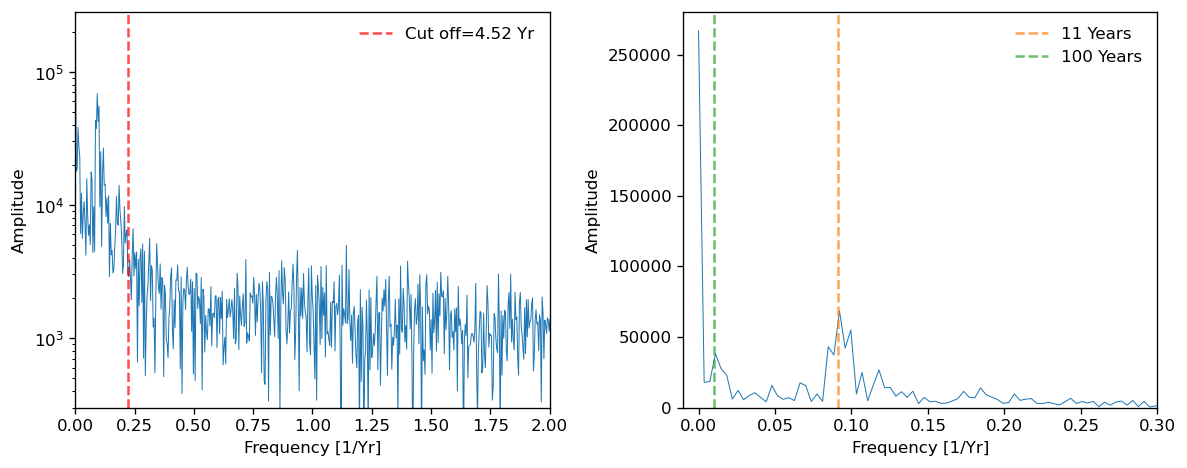

In [193]:
n = x.size                      # number of harmonics in model

x_freqdom = fft.rfft(x)
f = fft.rfftfreq(n, d=(t[-1]-t[0])/len(t))  

fig,axs = plt.subplots(1,2, figsize=(10,4), dpi=120)

plt.subplot(121)
plt.plot(f, np.abs(x_freqdom), lw=0.6, alpha=1)

plt.axvline(f[n_harm], ls='--', c='r', lw=1.5, alpha=0.7, label='Cut off=%1.2f Yr'%(1/f[n_harm]))

plt.xlim([0,2])
plt.ylim(bottom=3e2)
plt.yscale('log')
plt.legend(frameon=0)

plt.ylabel(r"Amplitude")
plt.xlabel(r"Frequency [1/Yr]")

plt.subplot(122)
plt.plot(f, np.abs(x_freqdom), lw=0.6, alpha=1)

plt.axvline(1./11, ls='--', c='C1', lw=1.5, alpha=0.7, label='11 Years')
plt.axvline(1./100, ls='--', c='C2', lw=1.5, alpha=0.7, label='100 Years')


plt.xlim([-.01,0.3])
plt.ylim(bottom=0)
# plt.yscale('log')
plt.legend(frameon=0)

plt.ylabel(r"Amplitude")
plt.xlabel(r"Frequency [1/Yr]")

plt.tight_layout()

# plt.savefig('FFT_spec.png')

plt.show()

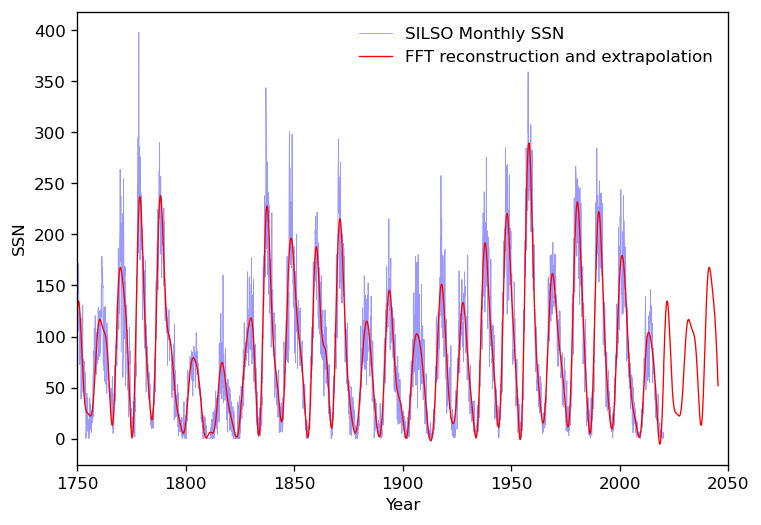

In [200]:
n_predict = 300
n_harm    = 60
extrapolation = fourierExtrapolation(x, n_predict, n_harm)

step = (t[-1]-t[0])/len(t)
extra_frac_year = np.concatenate((t, np.linspace(t[-1], t[-1]+n_predict*step+0.5*step, n_predict)) )

fig,ax = plt.subplots(figsize=(7,5), dpi=120)

plt.plot(t, x, 'b', label = 'SILSO Monthly SSN', lw=0.5, alpha=0.4)
plt.plot(extra_frac_year, extrapolation, 'r', label = 'FFT reconstruction and extrapolation', lw=0.8)

plt.legend(frameon=0)

plt.xlim([1750,2050])

plt.ylabel(r"SSN")
plt.xlabel(r"Year")

plt.savefig('FFT_extr.png')

plt.show()

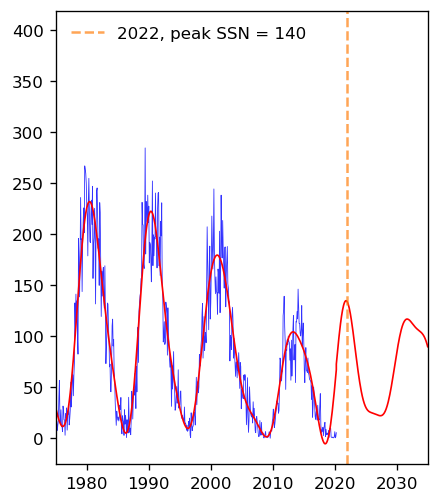

In [199]:
fig,ax = plt.subplots(figsize=(4,5), dpi=120)

plt.plot(t, x, 'b',  lw=0.5, alpha=0.8)
plt.plot(extra_frac_year, extrapolation, 'r',  lw=1)

plt.xlim([1975,2035])

plt.axvline(2022, ls='--', c='C1', lw=1.5, alpha=0.7, label='2022, peak SSN = 140')


plt.legend(frameon=0)
plt.savefig('FFT_extr2.png')

plt.show()